In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("new_degree.csv")
df.head()

,Unnamed: 0,gender,race,education,lunch,test preparation course,math,reading,writing,Average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,some college,standard,none,76,78,75,76.333333


In [4]:
# The size of the data set
df.shape

(1000, 10)

In [5]:
# checking for nan values
df.isnull().any()

Unnamed: 0                 False
gender                     False
race                       False
education                  False
lunch                      False
test preparation course    False
math                       False
reading                    False
writing                    False
Average                    False
dtype: bool

In [6]:
# change the name of some columns in order to manipulate easily 
df = df.rename(columns={"race/ethnicity": "race", "math score": "math", "reading score":"reading", "writing score":"writing", "parental level of education":"education"})
df.head()

,Unnamed: 0,gender,race,education,lunch,test preparation course,math,reading,writing,Average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,some college,standard,none,76,78,75,76.333333


In [7]:
# Using a method to examine some basics statistics
df.describe()

,Unnamed: 0,math,reading,writing,Average
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,499.500000,66.08900,69.169000,68.054000,67.770667
std,288.819436,15.16308,14.600192,15.195657,14.257326
min,0.000000,0.00000,17.000000,10.000000,9.000000
25%,249.750000,57.00000,59.000000,57.750000,58.333333
50%,499.500000,66.00000,70.000000,69.000000,68.333333
75%,749.250000,77.00000,79.000000,79.000000,77.666667
max,999.000000,100.00000,100.000000,100.000000,100.000000


C:\Users\nikos\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


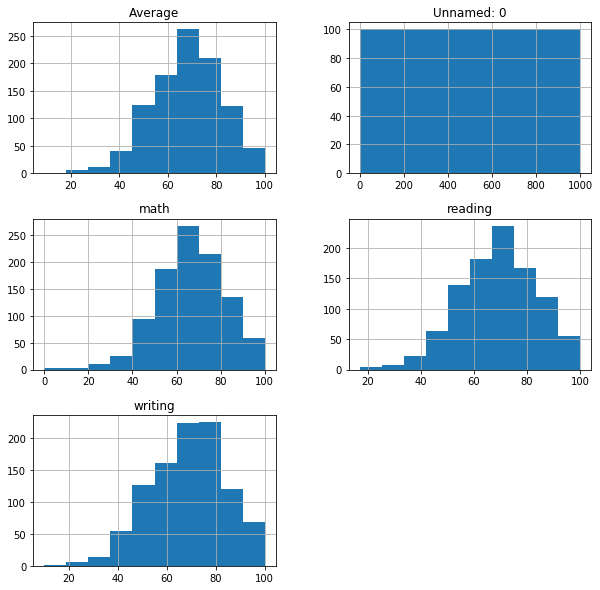

In [8]:
# Visualize the features of the data set
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

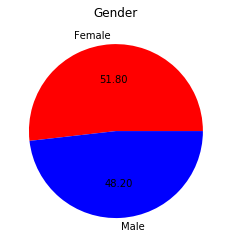

In [10]:
## The precentage of males, females at the survey
female = df.loc[df["gender"] == "female"].count()[0]
male = df.loc[df["gender"] == "male"].count()[0]

plt.title("Gender")

labels = ["Female", "Male"]
colors = ["r","b"]

plt.pie([female, male], labels=labels, colors=colors, autopct="%.2f")
plt.show()

In [11]:
# Creating a new column, which represent the average score of the tree courses 
df["Average"] = (df["math"] + df["reading"] + df["writing"])/3
df.head()

,Unnamed: 0,gender,race,education,lunch,test preparation course,math,reading,writing,Average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,some college,standard,none,76,78,75,76.333333


In [12]:
df.to_csv("new_degree.csv")

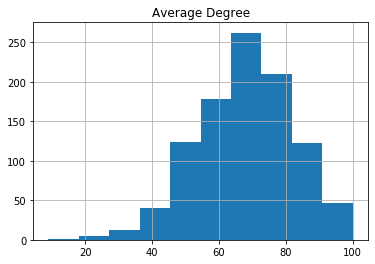

In [13]:
## Plot and the Average scores
plt.title("Average Degree")
df.Average.hist()
plt.show()

In [14]:
# Examine which group of students made the best average scores
average = df.groupby("race").mean()
average

,Unnamed: 0,math,reading,writing,Average
race,,,,,
group A,523.089888,61.629213,64.674157,62.674157,62.992509
group B,473.768421,63.452632,67.352632,65.600000,65.468421
group C,493.163009,64.463950,69.103448,67.827586,67.131661
group D,504.973282,67.362595,70.030534,70.145038,69.179389
group E,523.621429,73.821429,73.028571,71.407143,72.752381


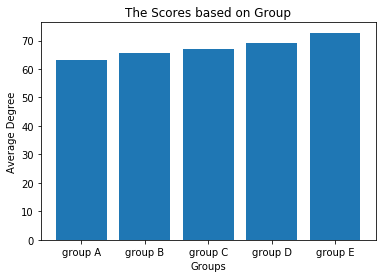

In [16]:
import matplotlib.pyplot as plt
x = [i for i, df in df.groupby("race")]

plt.title("The Scores based on Group")

plt.bar(x,average["Average"])
plt.xlabel('Groups')

plt.ylabel('Average Degree')
plt.show()

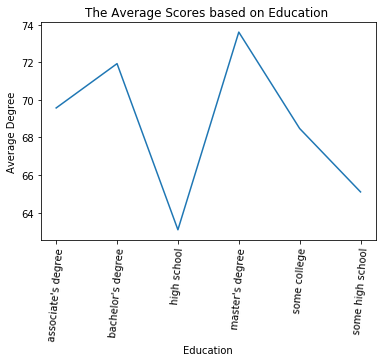

In [18]:
# The scores base on Education 
edu = df.groupby("education").mean()

x = [i for i, df in df.groupby("education")]
plt.title("The Average Scores based on Education ")

plt.plot(x,edu["Average"])

plt.xlabel('Education')
plt.ylabel('Average Degree')

plt.xticks(x, rotation="85")
plt.show()

In [19]:
# Which gender has better scores?
res = df.groupby("gender").mean()
res

,Unnamed: 0,math,reading,writing,Average
gender,,,,,
female,511.484556,63.633205,72.608108,72.467181,69.569498
male,486.620332,68.728216,65.473029,63.311203,65.837483


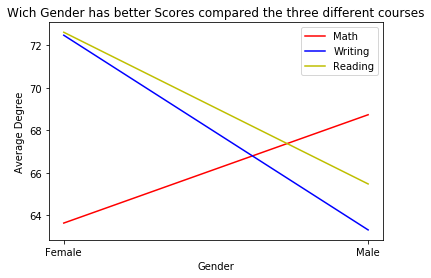

In [21]:
x = ["Female", "Male"]

plt.title("Wich Gender has better Scores compared the three different courses")

plt.plot(x, res["math"], label="Math", color="r")
plt.plot(x, res["writing"], label="Writing", color="b")
plt.plot(x, res["reading"], label="Reading", color="y")

plt.xlabel('Gender')
plt.ylabel('Average Degree')

plt.legend()
plt.show()

In [22]:
## The males are better on Maths, on the other hand, the females are better on the other two courses

In [23]:
## Examine how the degrees divided
D_grades = df.loc[df["Average"]<30].count()[0]
C_grades = df.loc[(df["Average"] >= 30) & df["Average"]<60].count()[0]
B_grades = df.loc[(df["Average"] >= 60) & df["Average"]<80].count()[0]
A_grades = df.loc[df["Average"]>=80].count()[0]



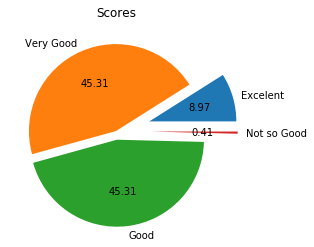

In [24]:
plt.title("Scores")
plt.style.use("ggplot")

explode=(.4,.0,.1,.4)

labels = ["Excelent","Very Good", "Good", "Not so Good"]
plt.pie([A_grades,B_grades,C_grades,D_grades], labels=labels, autopct="%.2f", explode=explode)
plt.show()

In [25]:
df.head()

,Unnamed: 0,gender,race,education,lunch,test preparation course,math,reading,writing,Average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,some college,standard,none,76,78,75,76.333333


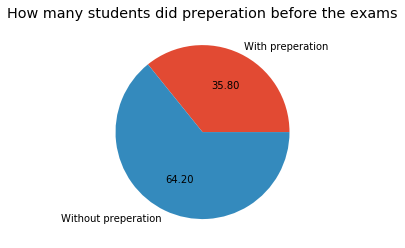

In [26]:
# check the preperation before the course

df = df.rename(columns = {"test preparation course":"preperation"})
completed = df.loc[df['preperation'] == "completed"].count()[0]
none = df.loc[df["preperation"] == "none"].count()[0]

plt.title("How many students did preperation before the exams")

plt.style.use("ggplot")

labels = ["With preperation","Without preperation"]
plt.pie([completed,none], labels=labels, autopct="%.2f" )

plt.show()

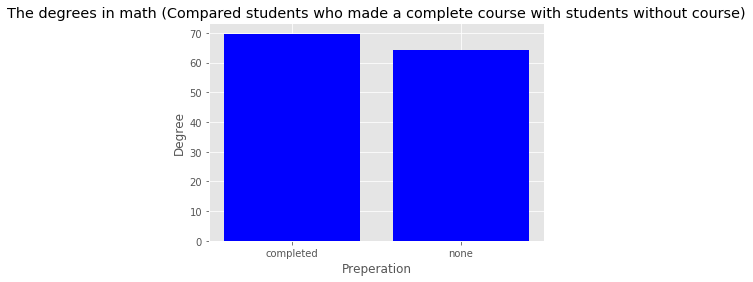

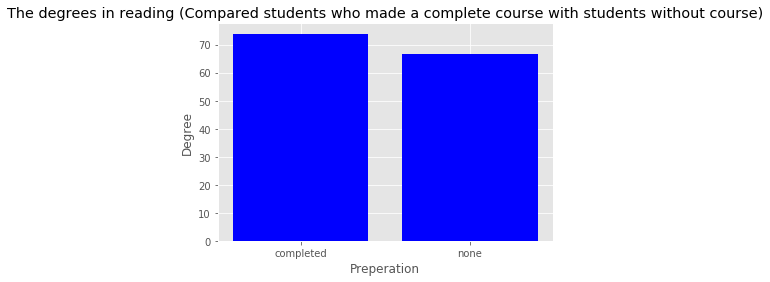

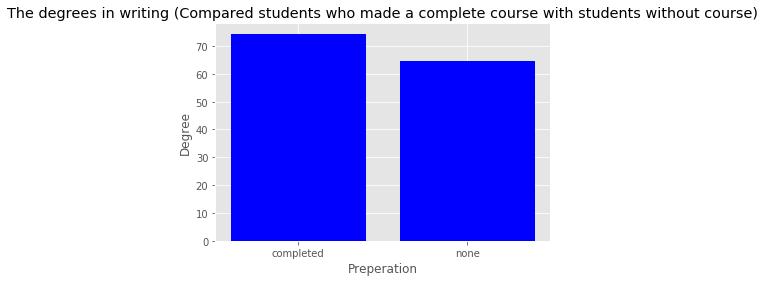

In [27]:
# Find the scores beteween the students whit preperation and without.
a = ["math", "reading", "writing"]
for j in a:
    com = df.groupby("preperation").mean()

    preperation = [i for i, df in df.groupby("preperation")]
    plt.bar(preperation, com[j], color="b")

    plt.title("The degrees in "+ j + " (Compared students who made a complete course with students without course)")

    plt.xlabel("Preperation")
    plt.ylabel("Degree")

    plt.show()

In [28]:
## The course that was difficult for all the student was the maths.
# Compare males and females with preparation and without preparation before the course and examine if it’s necessary the course before the exams

# How many males made preperation before the course
print("The males that made preperation were", df.loc[(df["preperation"] == "completed") & (df["gender"]=="male")].count()[0])
df3 = df[df["gender"]=="male"]

male_prep = df3.groupby("preperation")["math"].mean()
male_prep

The males that made preperation were 174


preperation
completed    72.339080
none         66.688312
Name: math, dtype: float64

In [29]:
# How many females made preperation before the course
print("The females that made preperation were", df.loc[(df["preperation"] == "completed") & (df["gender"]=="female")].count()[0])
df3 = df[df["gender"]=="female"]

female_prep = df3.groupby("preperation")["math"].mean()
female_prep

The females that made preperation were 184


preperation
completed    67.195652
none         61.670659
Name: math, dtype: float64

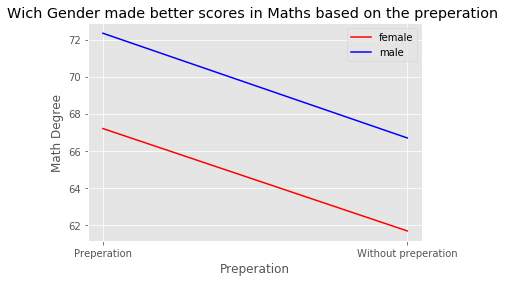

In [30]:
x = ["Preperation", "Without preperation"]

plt.title("Wich Gender made better scores in Maths based on the preperation ")

plt.plot(x, female_prep, label="female", color="r")
plt.plot(x, male_prep, label="male", color="b")

plt.xlabel('Preperation')
plt.ylabel('Math Degree')

plt.legend()
plt.show()

In [31]:
# We have  a big differnce between males and females scores in Maths. The males are better in Math, on the other hand the females are
# better at the other  two courses. Maybe it was the preperation ? 
# As we can see above the preperation wasn't the reason, more females than males had a preperation before the exams but their degrees were lower than the males.